# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [73]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import random_correlation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [162]:
# number of callbacks for black-sounding names
bc=sum(data[data.race=='b'].call)
print(bc)

# number of N0-callbacks for black-sounding names
bnc=len(df1[data.race=='b'][data.call==0])
print(bnc)

# number of callbacks for white-sounding names
wc=sum(data[data.race=='w'].call)
print(wc)

# number of N0-callbacks for White-sounding names
wnc=len(df1[data.race=='w'][data.call==0])
print(wnc)

157.0
2278
235.0
2200


### What test is appropriate for this problem? Does CLT apply?
A/B Test is appropriate for this problem as we are trying to find out if race on the resume had an impact on the employer's decision to call the candidate or not. Yes. CLT does apply as we have a sample size > 30.

### What are the null and alternate hypotheses?
Null= Race has an impact whether a candidate will get a call back or not
Alternative=Other factors of the candidates have an impact on the call backs


### Compute margin of error, confidence interval, and p-value.

In [125]:
bpop=np.array([True]*157+[False]*2278)
wpop=np.array([True]*235+[False]*2200)
def frac_rejects(bpop,wpop):
    frac=np.sum(bpop)/len(bpop)
    return frac

In [170]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] =func(perm_sample_1,perm_sample_2)

    return perm_replicates

perm_replicates=draw_perm_reps(bpop,wpop,frac_rejects,10000)

p=np.sum(perm_replicates<=157/2435)/10000
print('Probability:', p)

m1=np.mean(perm_replicates)
CI=np.percentile(m1,[0.5,98.5])
print('99% Confidence Internal:',CI)

stdv=np.std(perm_replicates)
print('Standard Deviation:',stdv)

ME=2.58*(stdv/np.sqrt(10000))
print('Margin of Error is 0:',ME)

Probability: 0.0
99% Confidence Internal: [ 0.08045577  0.08045577]
Standard Deviation: 0.00389274865103
Margin of Error is 0: 0.000100432915197


### Write a story describing the statistical significance in the context or the original problem
We got a p value of 0.0001 with a Standard Deviation of 0.0003 and a Margin of Error of 0.0001. So we cannot reject the hypothesis that Race plays a role whether a candidate gets a call back or not.

### Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?
No. Analysis does not prove that race is the most important factro but it only means that we cannot reject the Hypothesis that Race of a candidate has an impact whether a candidate will get a call back or not. 

I would amend my analysis to include how much other factors of a candidate play a role in whether a candidate gets a call or not. It would include coorelationship analysis showing the weightage of each factor influencing the call back.

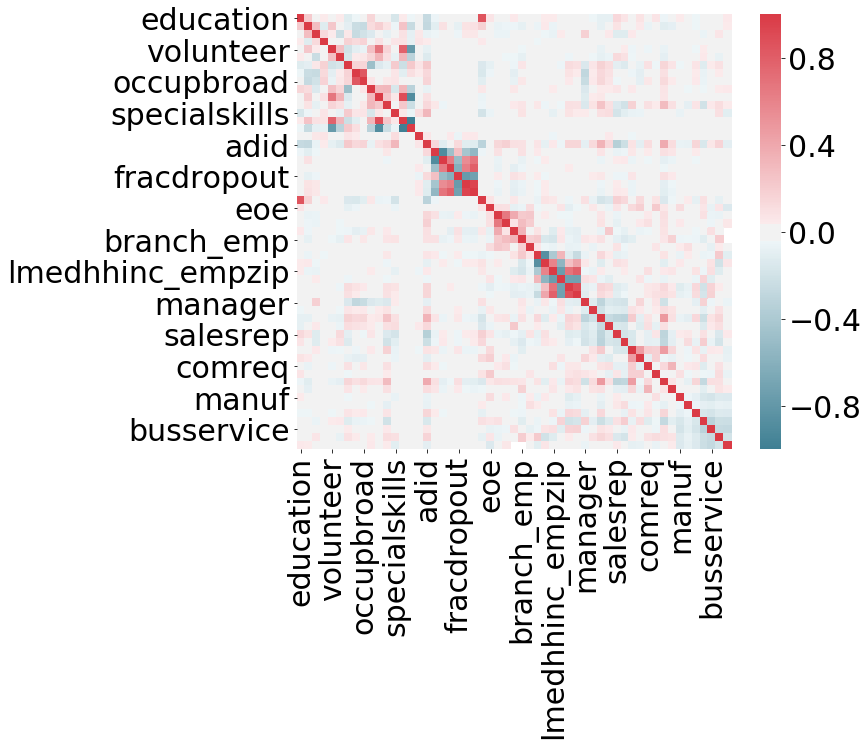

In [171]:
#Correlationship EDA

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

